In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly as pl
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import sklearn

In [4]:
train=pd.read_csv('train.csv')

In [6]:
columns=train.columns.values

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [23]:
intcol=[]
flcol=[]
obcol=[]
for each in columns:
    if type(train[each][0])==np.int64:
        intcol.append(each)
    if type(train[each][0])==np.float64:
        flcol.append(each)
    if type(train[each][0])==str:
        obcol.append(each)

In [24]:
print(intcol,flcol,obcol)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'] ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 

In [27]:
print(intcol+flcol)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [46]:
intcolco={}
flcolco={}
obcolco={}
for each in intcol:
    intcolco[each]=train[each].nunique()
for each in flcol:
    flcolco[each]=train[each].nunique()
for each in obcol:
    obcolco[each]=train[each].nunique()


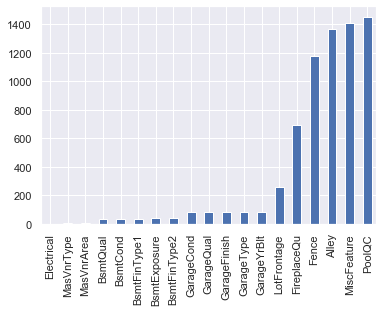

In [110]:
#check for missing data and plot
missing=train.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

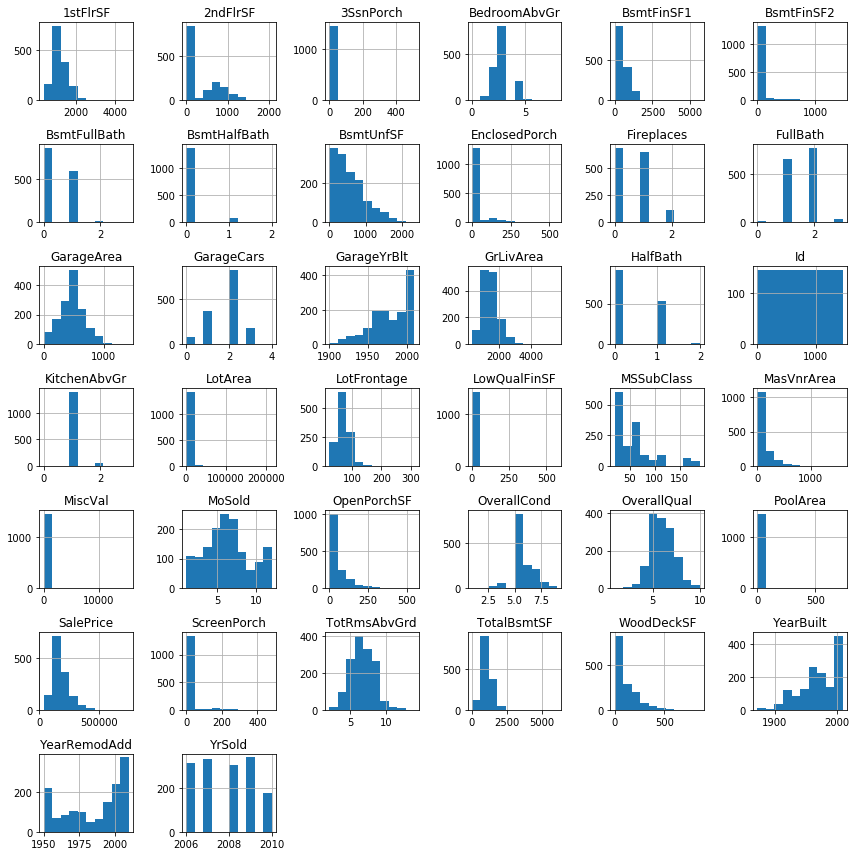

In [63]:
#okay we need to predict the sales price so let's see the distribution of all the unit variables
#univariate analysis
fig=train[intcol+flcol].hist(figsize=(12,12))
plt.tight_layout()

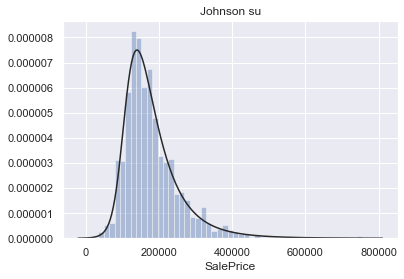

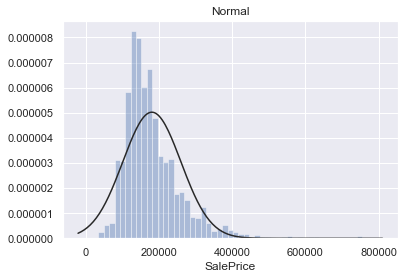

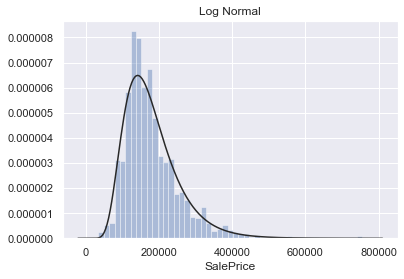

In [113]:
#detailed sales distribution 
#let's plot johnson, norm and lognorm 
'''It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed. 
While log transformation does pretty good job, best fit is unbounded Johnson distribution.'''
import scipy.stats as st
y=train['SalePrice']
plt.figure(1); plt.title('Johnson su')
sns.distplot(y,kde=False,fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y,kde=False,fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y,kde=False,fit=st.lognorm)

In [118]:
#let's check if all the quantitaive varibles follow normal distribution
#shapiro should be less then 0.01 for normality to be determined
test_normality =lambda x:stats.shapiro(x.fillna(0))[1]<0.01
normal =train[intcol+flcol]
normal =normal.apply(test_normality)
print(not normal.any())
#Also none of quantitative variables has normal distribution so these should be transformed as well.

False


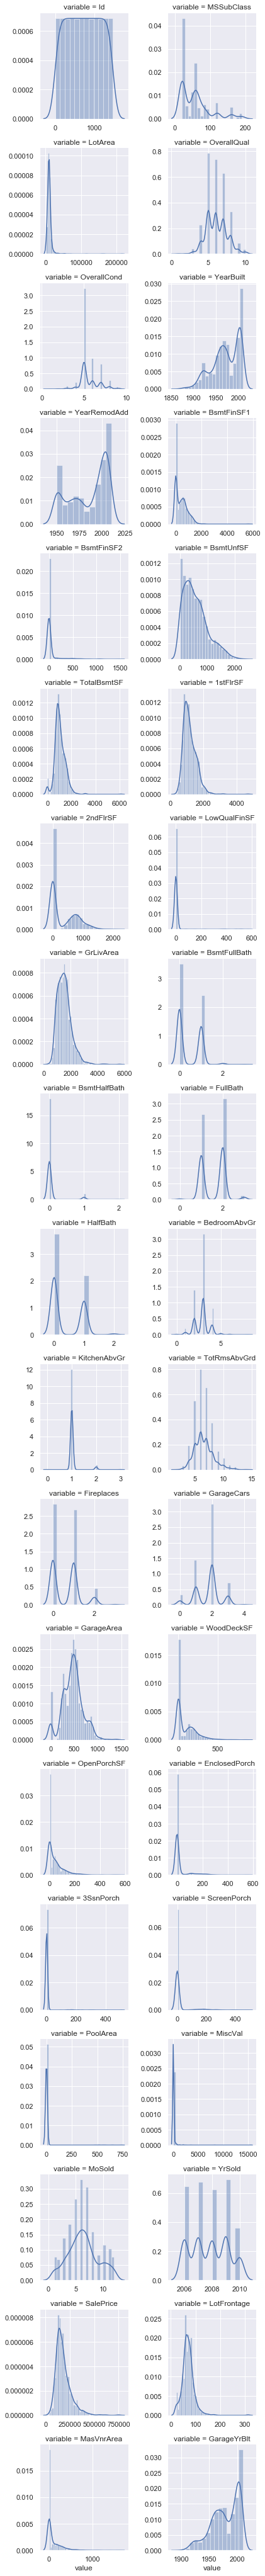

In [121]:
#plot all the distribution using pd.melt and facetgrid
f=pd.melt(train,value_vars=intcol+flcol)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

'''Some independent variables look like good candidates for log transformation: TotalBsmtSF, KitchenAbvGr, LotFrontage,
LotArea and others. While ganining on regression transformation will smooth out some irregularities which could be 
important like large amount of houses with 0 2ndFlrSF. 
Such irregularities are good candidates for feature construction.'''

In [126]:
#categorical variables
print(obcol)
for c in obcol:
    train[c]=train[c].astype('category')
    if train[c].isnull().any():
        train[c]=train[c].cat.add_categories(['MISSING'])
        train[c]=train[c].fillna('MISSING')

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


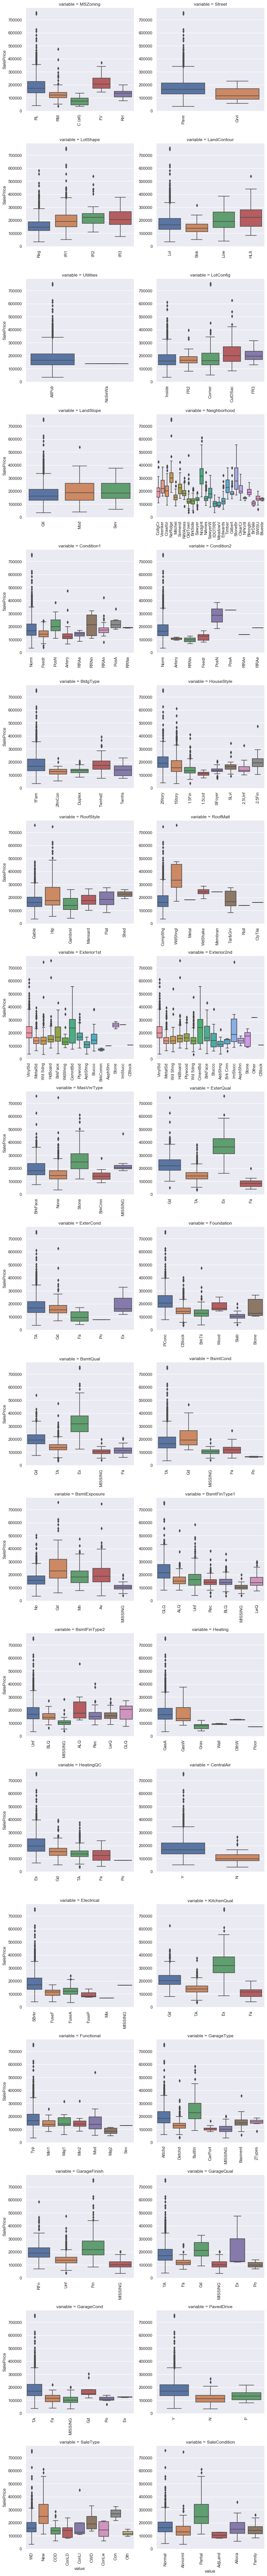

In [134]:
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)

f=pd.melt(train,id_vars=['SalePrice'],value_vars=obcol)
g=sns.FacetGrid(f,col="variable",col_wrap=2,sharex=False,sharey=False,size=5)
g=g.map(boxplot,"value","SalePrice")
plt.show()

In [ ]:
'''Some categories seem to more diverse with respect to SalePrice than others. Neighborhood has big impact on house prices. 
Most expensive seems to be Partial SaleCondition. Having pool on property seems to improve price substantially. 
There are also differences in variabilities between category values.'''

In [ ]:
#quick estimation of influence of categorical variable on sale price.For each variable SalePrices are 
#partitioned to distinct sets based on category values. Then check with ANOVA test if sets have similar distributions.
#If variable has minor impact then set means should be equal. 
#Decreasing pval is sign of increasing diversity in partitions.

def anova(frame):
    anv=pd.DataFrame()
    anv['feature']=obcol
    pvals=[]
    for c in obcol:
        samples=[]
        for cls in frame[c].unique():
            s=frame[frame[c]==cls]['SalePrice'].values
            samples.append(s)
            pval=stats.f_oneway(*samples)[1]
            pvals.append(pval)
    anv['pval']=pvals
    return anv.sort_values('pval')

a=anova(train)



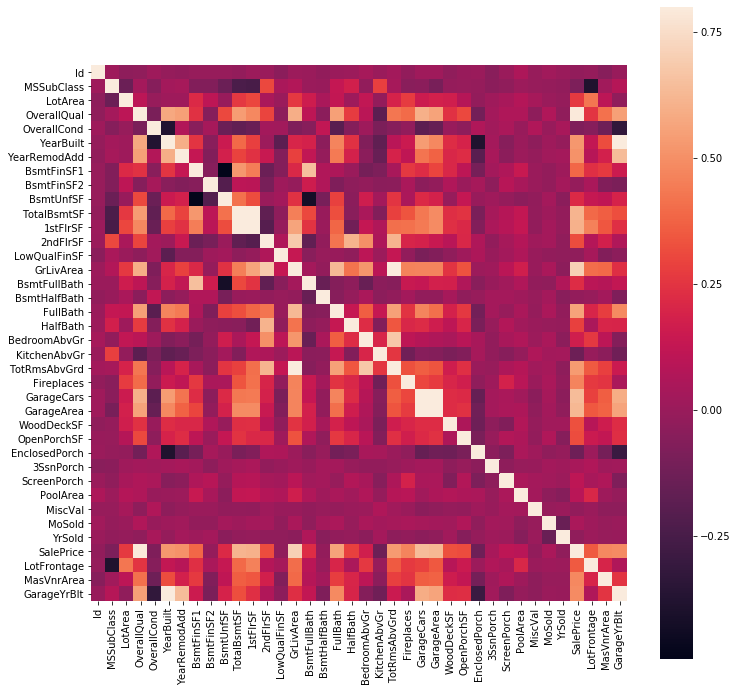

In [65]:
#let's see which are these variables are correlated 

corrmat =train[intcol+flcol].corr()
fig,ax =plt.subplots(1,figsize=(12,12))
sns.heatmap(corrmat,vmax=0.8,square=True)

In [80]:
#columns with top 10 correlations
cols=corrmat.nlargest(10,'SalePrice').index

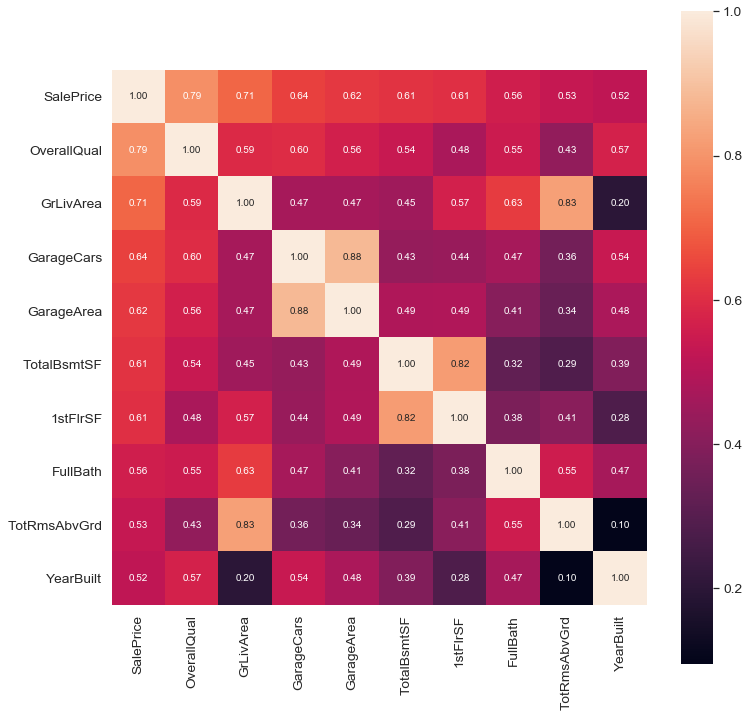

In [91]:
#now top 10 corrmatrices
fig,ax =plt.subplots(1,figsize=(12,12))
cm=np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

In [92]:
#these are the cols which are highly correlated to salesprice
print(cols)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


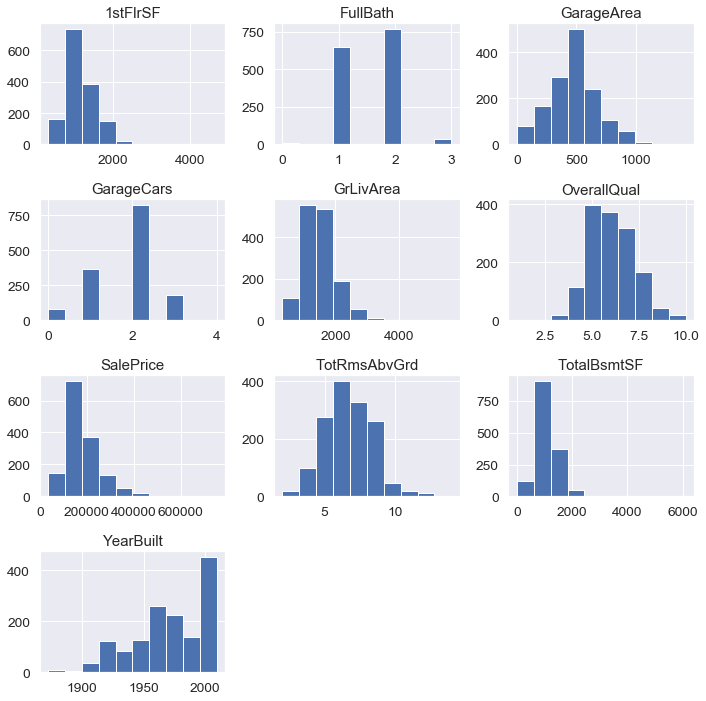

In [98]:
#distributions of these variabels 
fig,ax =plt.subplots(figsize=(10,10))
train[cols].hist(ax=ax)
plt.tight_layout()

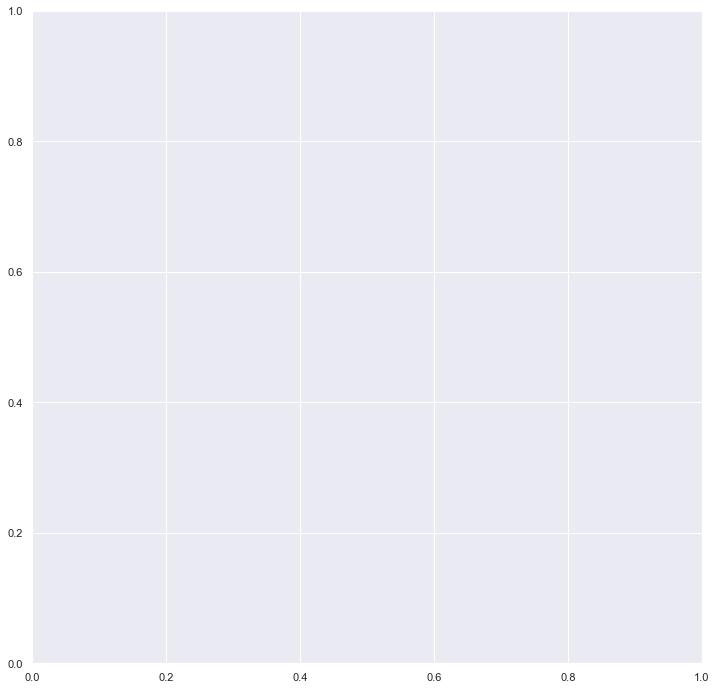

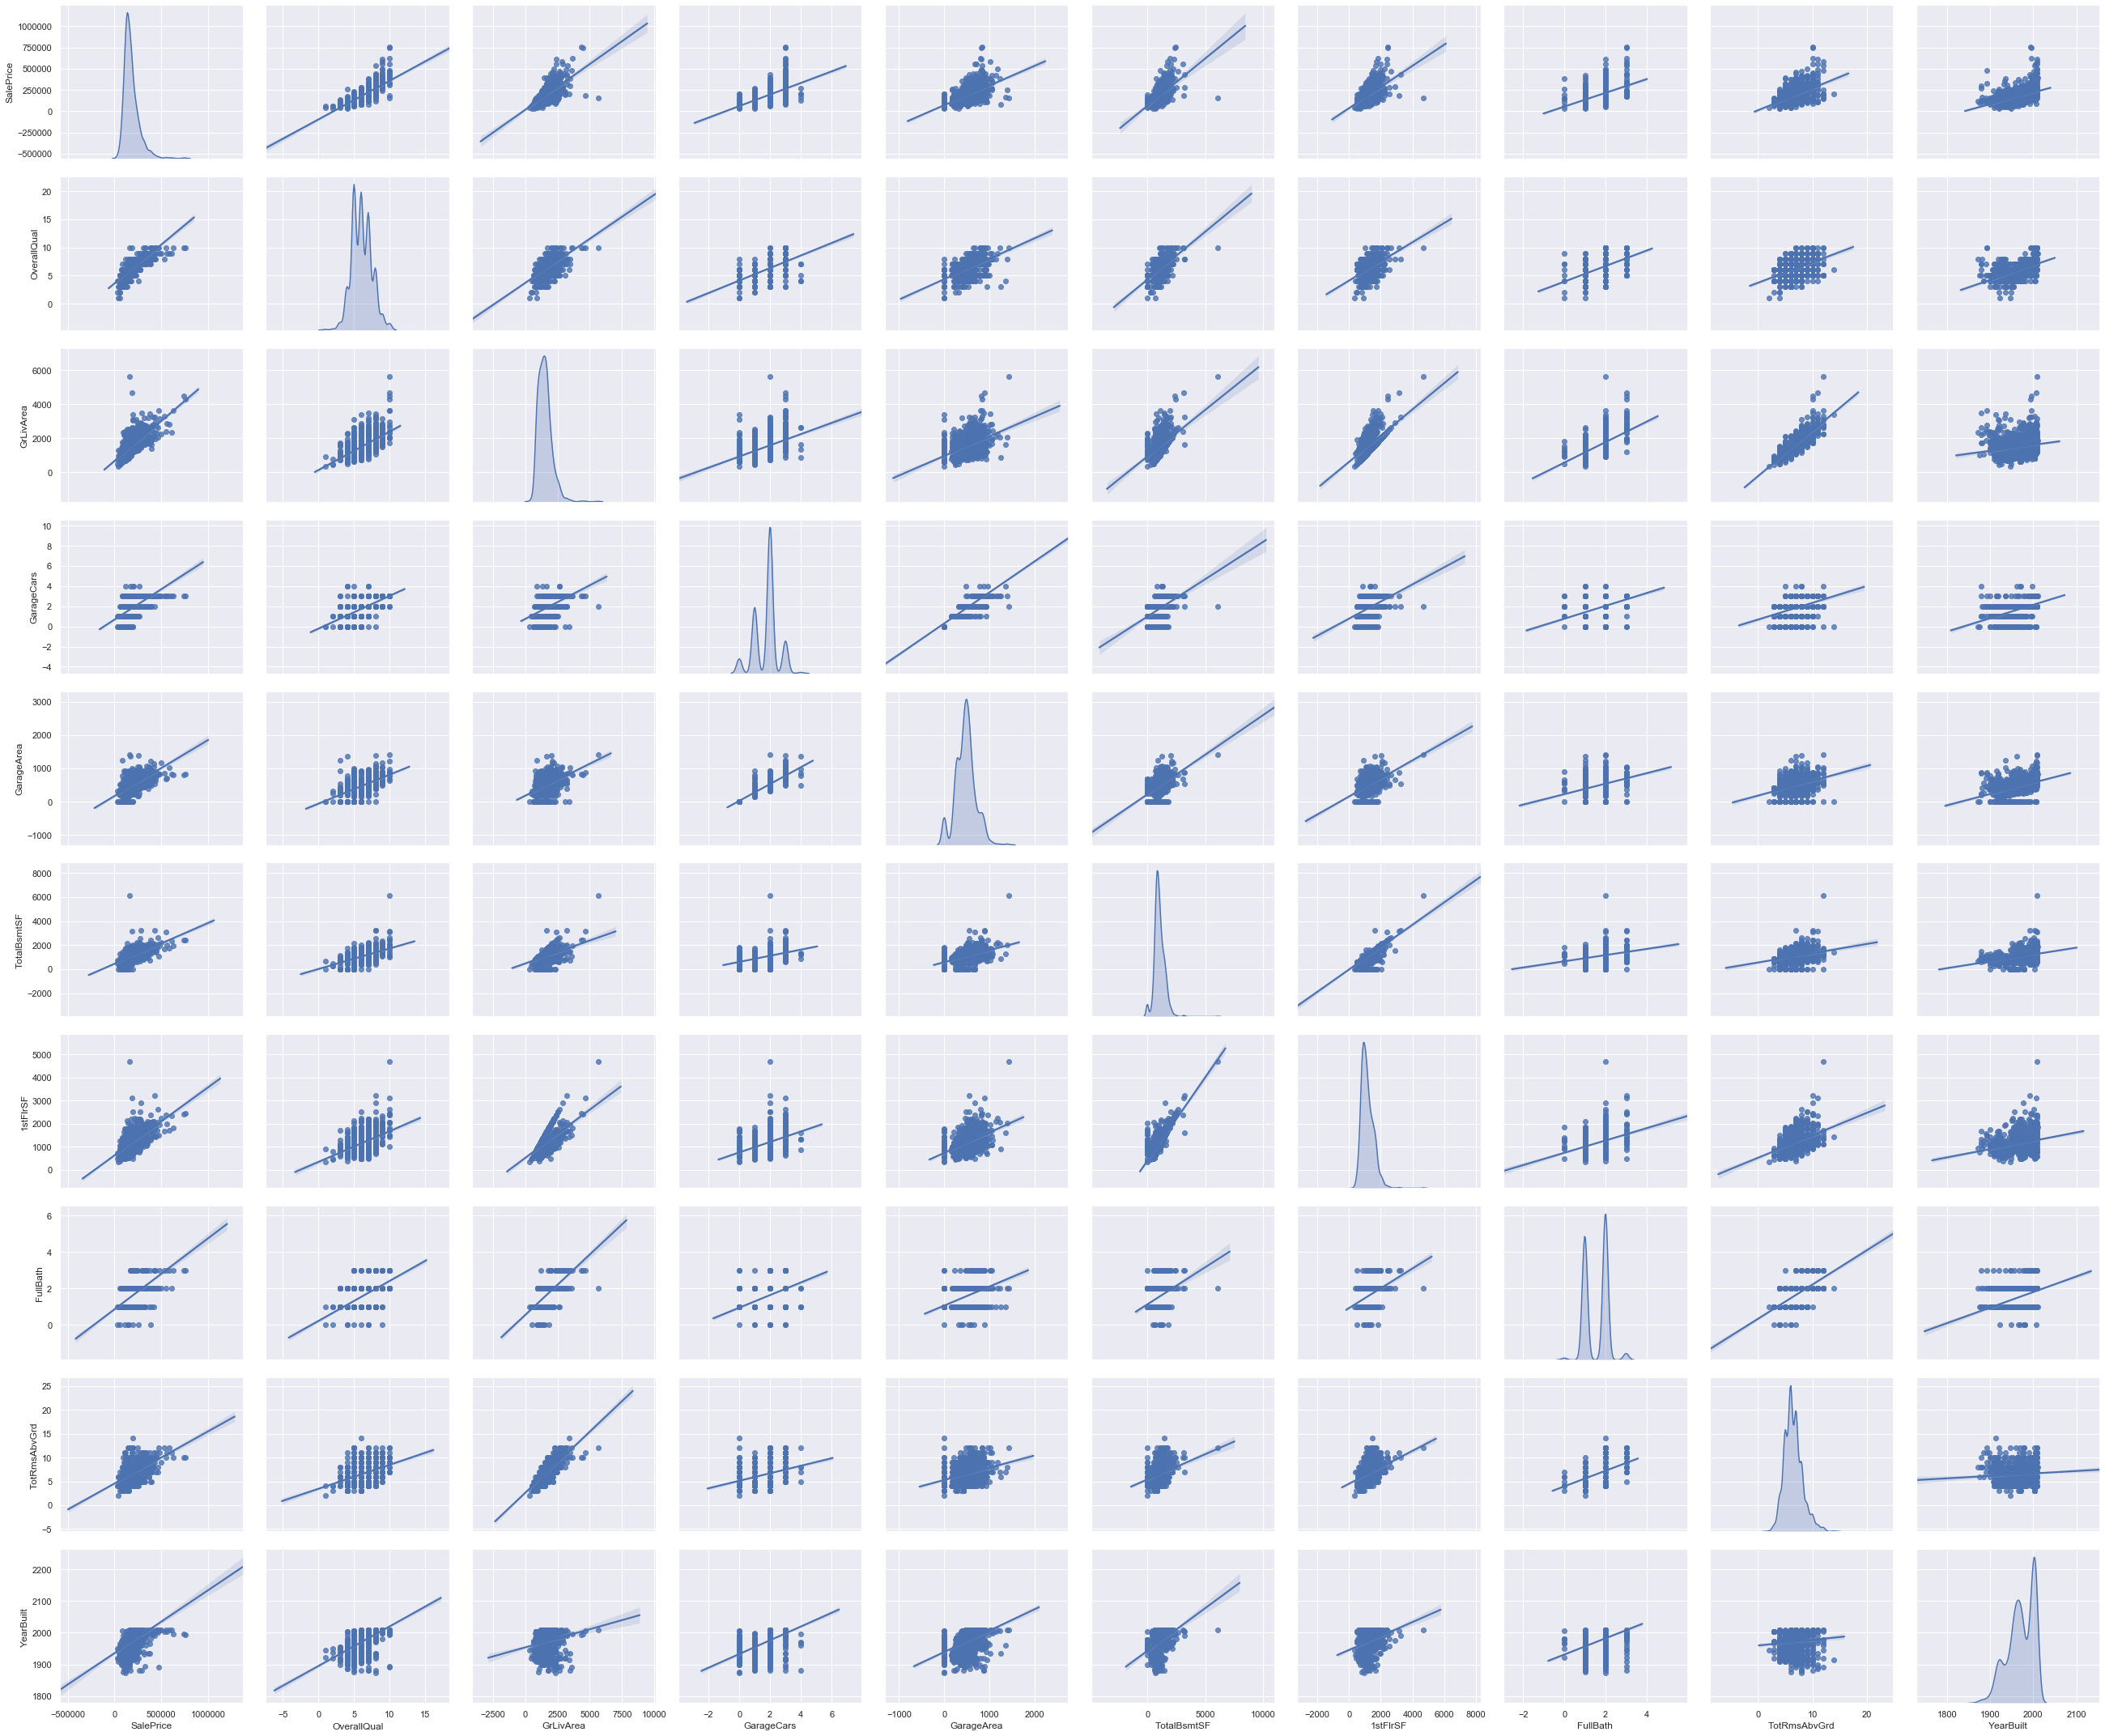

In [105]:
#now let's do a pairplot 
#2D analysis
fig,ax=plt.subplots(figsize=(12,12))
sns.set()
pp=sns.pairplot(train[cols],size=3,height=1.8,aspect=1.2,diag_kind="kde",kind="reg")
plt.show()